# Plot cluster map of samples mRNA

Script related to figure s5a

### Aim:
- Plot clustermap of transcriptomes as additional visualisation

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
home = '~/git_repos/HGSOC_TME_Heterogeneity/'

## Get sample labels

### Load file

In [5]:
file_keys = home + 'Data/5/NACT_SampleLabels.txt'

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

In [6]:
sample_labels.head()

,Name,Case_mRNA,NACT,Site,Bounds
Well,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in
A02,A02_3368B_Liver,3368,Treated,other,out
A03,A03_0371A_R_diaphragm,371,Untreated,other,out
A04,A04_0371B_R_diaphragm,371,Treated,other,out
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in


### Define sample colours

In [7]:
case_mrna = list(set(sample_labels['Case_mRNA']))

colours = sns.color_palette("husl", len(case_mrna)).as_hex()

sample_labels['Colour'] = sample_labels['Case_mRNA'].replace(case_mrna, colours)

### Define sample markers

In [8]:
sites = ['ovary','omentum','other']
markers = ['o','^','s']

sample_labels['Site_marker'] = sample_labels['Site'].replace(sites,markers)

In [9]:
sample_labels.head()

,Name,Case_mRNA,NACT,Site,Bounds,Colour,Site_marker
Well,,,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in,#62ae31,s
A02,A02_3368B_Liver,3368,Treated,other,out,#62ae31,s
A03,A03_0371A_R_diaphragm,371,Untreated,other,out,#f45deb,s
A04,A04_0371B_R_diaphragm,371,Treated,other,out,#f45deb,s
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in,#f564d1,o


## Load expression data

In [11]:
data_file = home + 'Data/5/NACT_log2exp_loess_norm.txt'

data = pd.read_csv(data_file,
                  sep='\t',
                  index_col='Hugo_Symbol')

In [12]:
data.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,3.878105,3.954775,3.854334,3.974302,3.760565,3.757145,3.734362,3.935987,3.807211,3.514725,...,3.919331,3.896646,4.027690,3.685888,3.765937,4.086110,4.000239,3.662362,3.896871,3.654871
A2BP1,2.862997,3.279474,3.957806,3.993876,3.641308,3.249292,3.347323,3.358668,3.616479,3.572950,...,3.490291,4.059473,3.679676,3.418869,2.924245,3.346328,3.899451,3.933936,4.425151,3.723115
A2M,5.516461,5.882656,6.421447,5.980470,5.049547,5.220719,5.492205,6.471173,5.341425,5.482726,...,6.366298,6.483692,5.784733,4.950854,6.164623,4.974455,6.709993,6.645714,6.391323,6.134008
A2ML1,3.958668,4.100177,3.250522,3.396357,3.851866,4.052745,3.635604,3.143886,3.999510,3.988277,...,3.300078,3.488284,3.120832,3.868837,3.519030,3.891299,3.151470,3.353788,3.617326,3.950268
A4GALT,3.087003,2.995708,3.395173,2.859539,2.976988,3.332730,3.317251,3.490682,3.087911,3.153865,...,3.440970,3.364598,3.214461,2.922184,3.054724,2.811116,2.929423,3.364648,3.325120,3.196659


## Perform sample correlation clustermap

In [13]:
data_corr = data.corr()

## Add tumour cellularity score

In [14]:
mRNA_tumcell_file = home + 'Data/5/NACT_log2exp_loess_norm_filtered_ESTIMATE.txt'

mRNA_tumcell = pd.read_csv(mRNA_tumcell_file,
                           skiprows=2,
                           sep='\t',
                           index_col='NAME')

del(mRNA_tumcell['Description'])

mRNA_tumcell.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
NAME,,,,,,,,,,,,,,,,,,,,,
StromalScore,150.243978,100.962227,967.051900,808.453034,-65.569315,489.893858,490.720381,1061.377025,235.450362,418.150347,...,263.744096,464.939728,802.734452,153.081049,1103.804616,579.702569,788.616732,1237.456125,887.344608,501.153545
ImmuneScore,176.145317,526.978700,1297.193578,1203.727348,131.468582,650.323221,407.055460,1082.029608,88.028614,282.209677,...,481.526245,516.592649,582.005013,29.396052,908.321033,258.334588,849.462145,1496.053219,969.848566,621.394231
ESTIMATEScore,326.389295,627.940928,2264.245478,2012.180381,65.899267,1140.217080,897.775841,2143.406633,323.478976,700.360025,...,745.270341,981.532377,1384.739465,182.477100,2012.125649,838.037157,1638.078877,2733.509343,1857.193174,1122.547776
TumorPurity,0.794327,0.766668,0.591924,0.621334,0.816969,0.716267,0.740642,0.606127,0.794586,0.759799,...,0.755497,0.732326,0.690764,0.806982,0.621341,0.746506,0.663403,0.535046,0.638998,0.718075


In [15]:
sample_labels['TumourCellularity_mRNA'] = mRNA_tumcell.loc['TumorPurity']

In [16]:
median_tumcell = sample_labels['TumourCellularity_mRNA'].median()
sample_labels['TumCell_RNA_bin'] = sample_labels['TumourCellularity_mRNA'] > median_tumcell

In [17]:
sample_labels['TumCell_RNA_bin'].replace([True,False],
                                         ['k','w'],
                                         inplace=True)

### Define binary treatment colour

In [18]:
sample_labels['NACT_colour'] = sample_labels['NACT'].replace(['Untreated','Treated'],
                                                             ['#377eb8','#e41a1c'])

In [19]:
sample_labels.head()

,Name,Case_mRNA,NACT,Site,Bounds,Colour,Site_marker,TumourCellularity_mRNA,TumCell_RNA_bin,NACT_colour
Well,,,,,,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in,#62ae31,s,0.794327,k,#377eb8
A02,A02_3368B_Liver,3368,Treated,other,out,#62ae31,s,0.766668,k,#e41a1c
A03,A03_0371A_R_diaphragm,371,Untreated,other,out,#f45deb,s,0.591924,w,#377eb8
A04,A04_0371B_R_diaphragm,371,Treated,other,out,#f45deb,s,0.621334,w,#e41a1c
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in,#f564d1,o,0.816969,k,#377eb8


### Plot

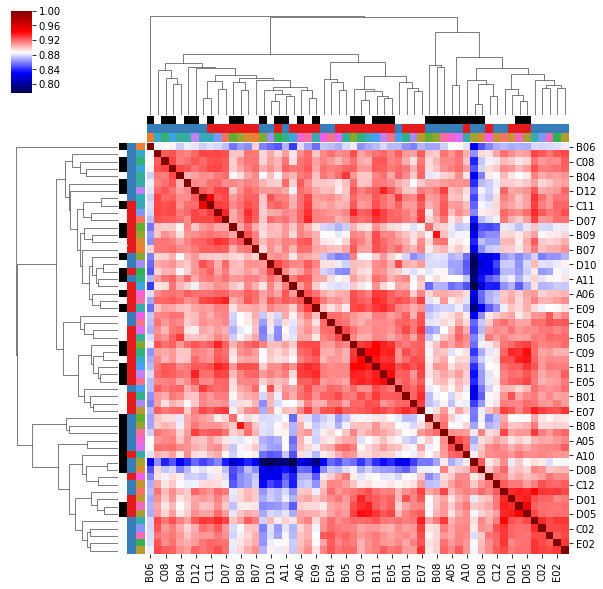

In [20]:
g = sns.clustermap(data_corr,
                   cmap='seismic',
                   metric='correlation',
                   row_colors=[sample_labels['TumCell_RNA_bin'],
                               sample_labels['NACT_colour'],
                               sample_labels['Colour']],
                   col_colors=[sample_labels['TumCell_RNA_bin'],
                               sample_labels['NACT_colour'],
                               sample_labels['Colour']],
                   linewidths=0.0, rasterized=True
                  )

### Save plot

In [21]:
g.savefig('../../Figures/supplementary/5/panels/s5a_NACT_mRNA_clustermap.pdf',
          bbox='tight')

# End script